# Python Bootcamp Project 24-25: Customer Segmentation

In [66]:
# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Revenue Contribution Analysis: Identifying products or categories
contributing the most to overall revenue.
2. Product Segmentation: Grouping products based on sales volume,
revenue, and daily sales trends.
3. Customer Purchase Patterns: Segmenting customers based on or-
der frequency and total spending.
4. Daily Sales Trends: Analyzing daily sales data to identify peak pe-
riods and consistent performers.
3
5. Order Behavior Analysis: Examining the distribution and frequency
of total orders per product.
6. Marketing Campaign Effectiveness: Using cluster insights to rec-
ommend promotional strategies for different segments

## Data Import

In [68]:
df = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMNS OF DATASET *****************************************************')
df.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
df.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
df.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
df.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
df.describe()


******************************************** COLUMNS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [69]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Number of rows are {num_rows}, and number of columns are {num_cols}.')
column_names = df.columns.tolist()
column_names

Number of rows are 541909, and number of columns are 8.


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Data Cleaning

In [84]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [85]:
df.duplicated().sum()

np.int64(5268)

In [86]:
df.drop_duplicates(keep=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [87]:
# Check for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [92]:
# Drop rows with missing values in relevant fields
df.dropna(subset=['CustomerID', 'Description'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [93]:
# Remove rows with negative or zero Quantity or UnitPrice
df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Revenue Contribution Analysis: 
### Identifying products or categories contributing the most to overall revenue.

In [95]:
#calculating revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_13712\122665540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [97]:
# Group by StockCode and Description to calculate total revenue
revenue_per_product = df.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()
# Sort by revenue in descending order
revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending=False)
# Display the top contributors
revenue_per_product

,StockCode,Description,Revenue
1249,22423,REGENCY CAKESTAND 3 TIER,132870.40
3593,85123A,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
3586,85099B,JUMBO BAG RED RETROSPOT,83236.76
2613,47566,PARTY BUNTING,67687.53
3915,POST,POSTAGE,66710.24
...,...,...,...
3298,79323W,WHITE CHERRY LIGHTS,-54.00
1586,22769,CHALKBOARD KITCHEN ORGANISER,-87.80
3911,D,Discount,-5696.22
3910,CRUK,CRUK Commission,-7933.43


### Pareto Chart to Highlight Top 20 Contributors

In [101]:
# Sort by revenue in descending order and select the top 20 products
top_20_contributors = revenue_per_product.sort_values(by='Revenue', ascending=False).head(20)

# Calculate Cumulative Revenue and Cumulative Percentage
top_20_contributors['Cumulative Revenue'] = top_20_contributors['Revenue'].cumsum()
total_revenue = top_20_contributors['Revenue'].sum()
top_20_contributors['Cumulative %'] = (top_20_contributors['Cumulative Revenue'] / total_revenue) * 100

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of top 20 contributor')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'POSTAGE'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'RABBIT NIGHT LIGHT'),
  Text(7, 0, 'CHILLI LIGHTS'),
  Text(8, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(9, 0, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(10, 0, 'BLACK RECORD COVER FRAME'),
  Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(12, 0, 'SPOTTY BUNTING'),
  Text(13, 0, 'DOORMAT KEEP CALM AND COME IN'),
  Text(14, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
  Text(15, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(16, 0, 'JAM MAKING SET WITH JARS'),
  Text(17, 0, 'JUMBO BAG STRAWBERRY'),
  Text(18, 0, 'HEART OF WICKER LARGE'),
  Text(19, 0, 'VICTORIAN GLASS HANGING T-LIGHT')])

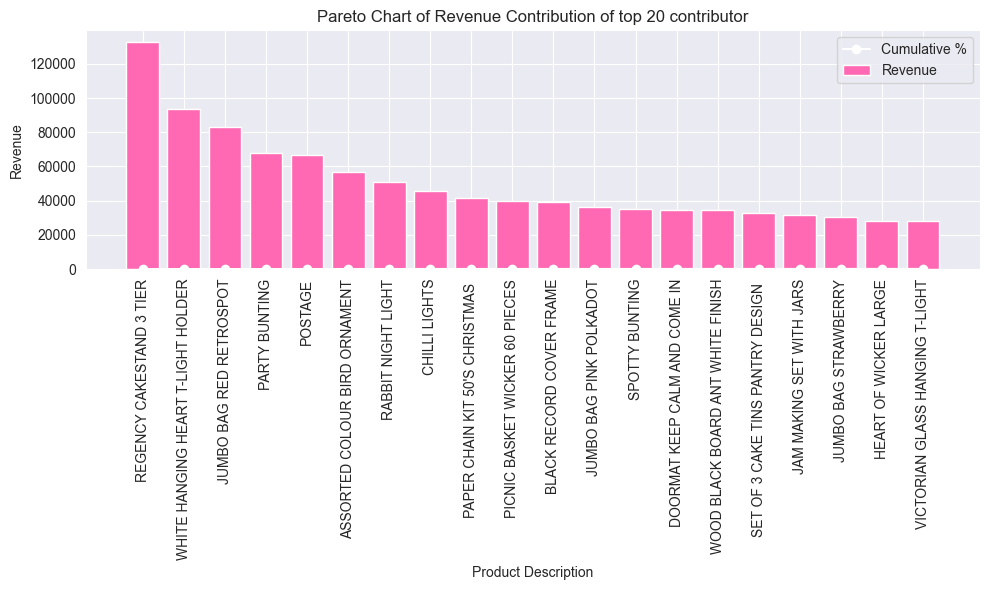

In [104]:
#Plot Pareto Chart
plt.figure(figsize=(10,6))
plt.bar(top_20_contributors['Description'], top_20_contributors['Revenue'], color='hotpink', label='Revenue')
plt.plot(top_20_contributors['Description'], top_20_contributors['Cumulative %'], color='white', marker = 'o', label='Cumulative %')

plt.title('Pareto Chart of Revenue Contribution of top 20 contributor')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
